In [13]:
import jpeg4py as jpeg
import torch
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import random
import pandas as pd

In [39]:
data_dir = Path("../other_datasets/AISegment.com/matting_human_half/")
img_dir = data_dir / "clip_img"
matte_dir = data_dir / "matting"

In [40]:
example_matte_path = matte_dir / "1803201916" / "matting_00000000" / "1803201916-00000010.png"
example_clip_path = img_dir / "1803201916" / "clip_00000000" / "1803201916-00000010.jpg"

example_fg = np.array(Image.open(example_matte_path)) / 255.
example_img = jpeg.JPEG(example_clip_path).decode() / 255.

In [41]:
example_matte = example_fg[:,:,3]
example_fg = example_fg[:,:,:3]

In [42]:
np.all(np.isclose(example_fg * np.stack([example_matte, example_matte, example_matte], axis=2),
       example_img * np.stack([example_matte, example_matte, example_matte], axis=2)))

False

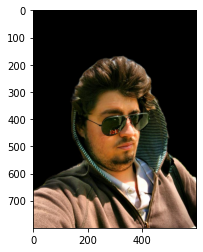

In [43]:
plt.imshow(example_img * np.stack([example_matte, example_matte, example_matte], axis=2))

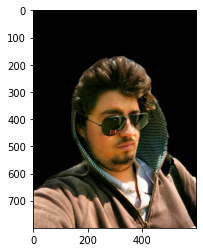

In [44]:
plt.imshow(example_fg * np.stack([example_matte, example_matte, example_matte], axis=2))

In [45]:

(example_fg * np.stack([example_matte, example_matte, example_matte], axis=2))[-100:]

array([[[0.91404844, 0.74217609, 0.63670896],
        [0.90623606, 0.73436371, 0.62889658],
        [0.89451749, 0.72264514, 0.61717801],
        ...,
        [0.51952326, 0.39843137, 0.32811995],
        [0.52733564, 0.40624375, 0.33593233],
        [0.47655517, 0.35546328, 0.28515186]],

       [[0.95701653, 0.78514418, 0.67967705],
        [0.92186082, 0.74998847, 0.64452134],
        [0.88670511, 0.71483276, 0.60936563],
        ...,
        [0.49217993, 0.37108804, 0.30077662],
        [0.51561707, 0.39452518, 0.32421376],
        [0.49608612, 0.37890042, 0.308589  ]],

       [[0.92576701, 0.75389466, 0.64842753],
        [0.91795463, 0.74608228, 0.64061515],
        [0.91404844, 0.74217609, 0.63670896],
        ...,
        [0.47264898, 0.35155709, 0.28124567],
        [0.5038985 , 0.38280661, 0.31249519],
        [0.51561707, 0.39452518, 0.32421376]],

       ...,

       [[0.80467512, 0.63280277, 0.53514802],
        [0.7382699 , 0.56639754, 0.46874279],
        [0.88670511, 0

In [46]:
(example_img * np.stack([example_matte, example_matte, example_matte], axis=2))[-100:]



array([[[0.91795463, 0.7382699 , 0.64452134],
        [0.91014225, 0.73045752, 0.63670896],
        [0.90232987, 0.72264514, 0.62889658],
        ...,
        [0.52342945, 0.39843137, 0.33983852],
        [0.53124183, 0.40233756, 0.34374471],
        [0.48436755, 0.35546328, 0.29687043]],

       [[0.96092272, 0.78123799, 0.68748943],
        [0.9296732 , 0.74998847, 0.65623991],
        [0.8906113 , 0.71092657, 0.61717801],
        ...,
        [0.49217993, 0.36718185, 0.308589  ],
        [0.52342945, 0.39452518, 0.33593233],
        [0.5038985 , 0.37499423, 0.31640138]],

       [[0.93357939, 0.75389466, 0.6601461 ],
        [0.92186082, 0.74217609, 0.64842753],
        [0.91795463, 0.7382699 , 0.64452134],
        ...,
        [0.47264898, 0.3476509 , 0.28905805],
        [0.50780469, 0.37890042, 0.32030757],
        [0.52342945, 0.39452518, 0.33593233]],

       ...,

       [[0.80858131, 0.62889658, 0.53905421],
        [0.74608228, 0.56639754, 0.47655517],
        [0.8906113 , 0

In [47]:
# различия скорее всего из-за разных форматов изображений: png и jpg.

In [48]:
img_paths = np.array(list(map(str, img_dir.rglob("*.jpg"))))
matte_paths = np.array(list(map(str, matte_dir.rglob("*.png"))))

In [49]:
print(len(img_paths), len(matte_paths))

ids = list(range(len(img_paths)))
train_frac = .8
val_frac = .1
test_frac = 1 - train_frac - val_frac
train_size = int(train_frac * len(ids))
val_size = int(val_frac * len(ids))
random.shuffle(ids)

train_ids = ids[:train_size]
val_ids = ids[train_size:train_size+val_size]
test_ids = ids[train_size+val_size:]

34426 34426


In [50]:
print(len(train_ids), len(val_ids), len(test_ids))

27540 3442 3444


In [51]:
train_img_paths_df = pd.DataFrame(columns=["path"], data=img_paths[train_ids])
train_matte_paths_df = pd.DataFrame(columns=["path"], data=matte_paths[train_ids])
val_img_paths_df = pd.DataFrame(columns=["path"], data=img_paths[val_ids])
val_matte_paths_df = pd.DataFrame(columns=["path"], data=matte_paths[val_ids])
test_img_paths_df = pd.DataFrame(columns=["path"], data=img_paths[test_ids])
test_matte_paths_df = pd.DataFrame(columns=["path"], data=matte_paths[test_ids])

In [52]:
train_img_paths_df.to_csv("../data/AISegment/train_images.csv", index=False)
train_matte_paths_df.to_csv("../data/AISegment/train_mattes.csv", index=False)
val_img_paths_df.to_csv("../data/AISegment/val_images.csv", index=False)
val_matte_paths_df.to_csv("../data/AISegment/val_mattes.csv", index=False)
test_img_paths_df.to_csv("../data/AISegment/test_images.csv", index=False)
test_matte_paths_df.to_csv("../data/AISegment/test_mattes.csv", index=False)

In [53]:
path_to_check = "/media/bsuleymanov/Новый том/2021/alpha-matting/src/../data/AISegment/val.csv"


print(Path(path_to_check))

/media/bsuleymanov/Новый том/2021/alpha-matting/src/../data/AISegment/val.csv


In [54]:
pd.read_csv(path_to_check)

FileNotFoundError: [Errno 2] No such file or directory: '/media/bsuleymanov/Новый том/2021/alpha-matting/src/../data/AISegment/val.csv'

In [3]:
random.sample([1, 2, 3], 0)

[]

In [13]:
bs, h, w = 32, 256, 256
x = torch.stack([
       torch.ones((bs, h, w)),
       torch.ones((bs, h, w)) * 3,
       torch.ones((bs, h, w)) * 5,
], dim=3)
y = torch.ones((bs, h, w, 1)) * 2

In [8]:
x.size(), y.size()

x * y

NameError: name 'x' is not defined

In [17]:
import jpeg4py
print(jpeg4py)



<module 'jpeg4py' from '/home/bsuleymanov/anaconda3/envs/ml/lib/python3.7/site-packages/jpeg4py/__init__.py'>
